In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV



In [85]:
pd.set_option('display.max_row',111)
#pd.set_option('display.max_col',111)


In [102]:
data = pd.read_csv('breast-cancer.csv')

In [87]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exploratory Data Analysis: EDA

In [88]:
data.shape

(569, 32)

we are 569 row and 32 columns
30 variables quantitatives and 1 qualitative

In [89]:
data.dtypes.value_counts()

float64    30
int64       1
object      1
Name: count, dtype: int64

In [90]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Let's check if we are missing value

In [91]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [92]:
# Check if we are a duplicate value
data.duplicated().sum()

0

Now let's delete id column

In [93]:
data = data.drop('id',axis=1)

In [94]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Univariate Analysis

In [95]:
data['diagnosis'].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

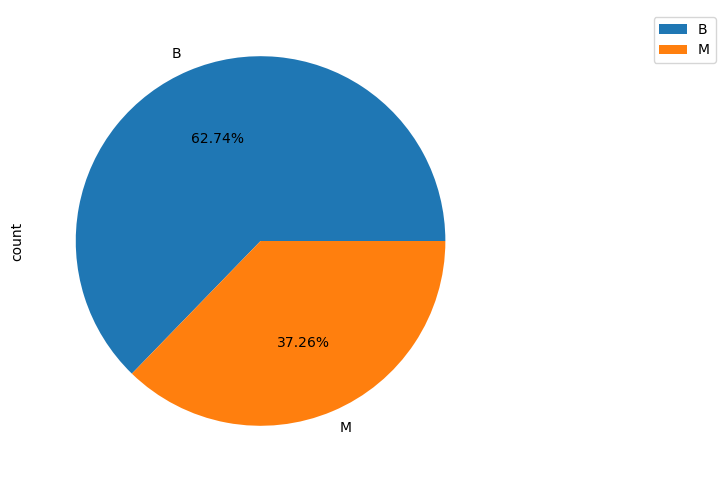

In [96]:
plt.figure(figsize=(14,6))
explode=0.1,0
data['diagnosis'].value_counts().plot.pie(autopct='%1.2f%%',labels=['B','M'])
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

We are a random distribution 67% for B and 37% for M

<Figure size 640x480 with 0 Axes>

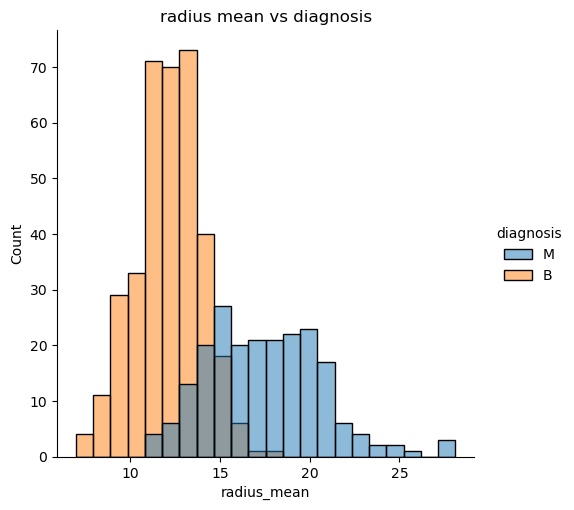

In [97]:
plt.figure()
sns.displot(x='radius_mean', hue='diagnosis', data=data)
plt.title('radius mean vs diagnosis')
plt.show()

<Figure size 640x480 with 0 Axes>

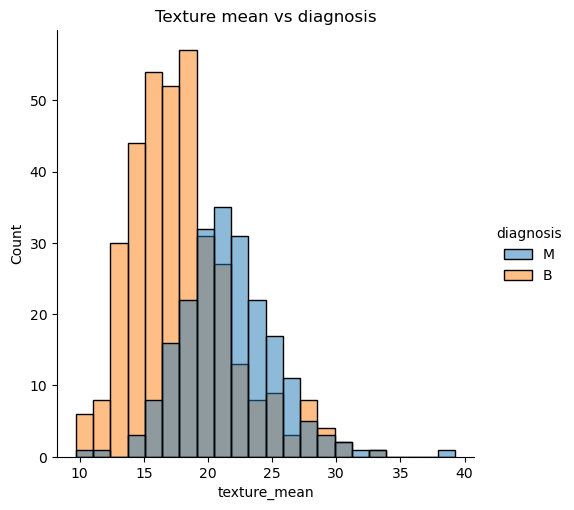

In [98]:
plt.figure()
sns.displot(x='texture_mean', hue='diagnosis', data=data)
plt.title('Texture mean vs diagnosis')
plt.show()

C:\Users\AD\AppData\Local\Temp\ipykernel_15472\2734530343.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

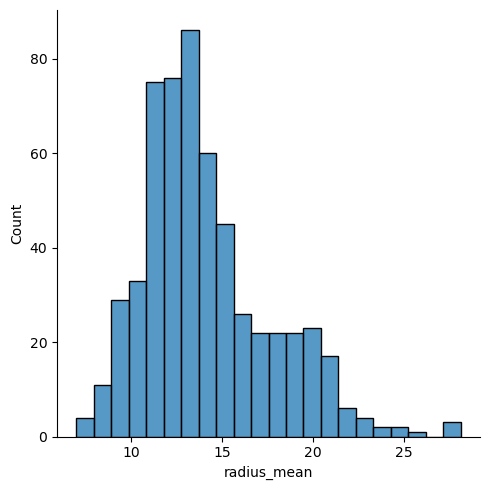

<Figure size 640x480 with 0 Axes>

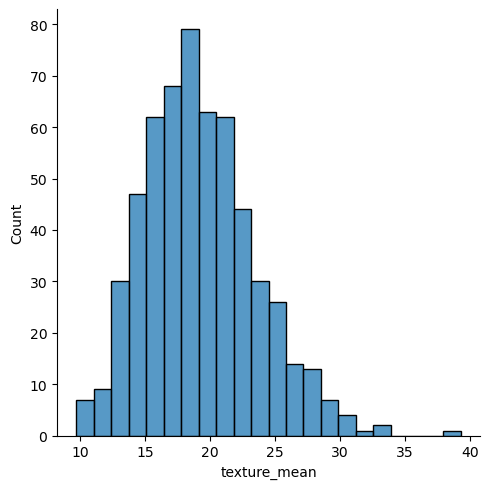

<Figure size 640x480 with 0 Axes>

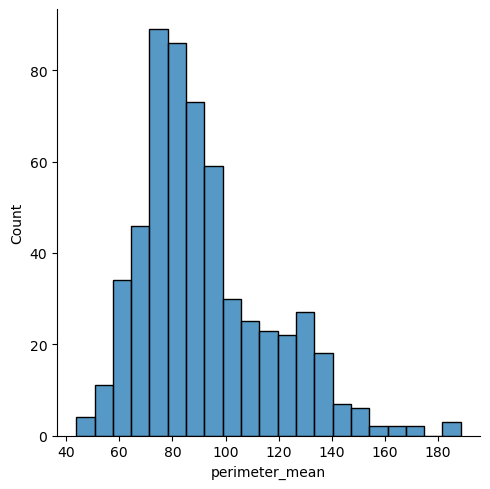

<Figure size 640x480 with 0 Axes>

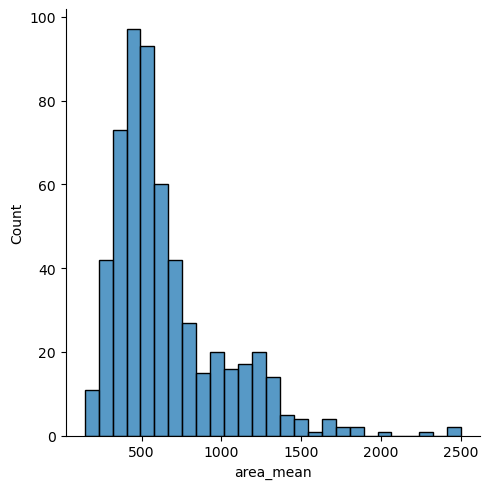

<Figure size 640x480 with 0 Axes>

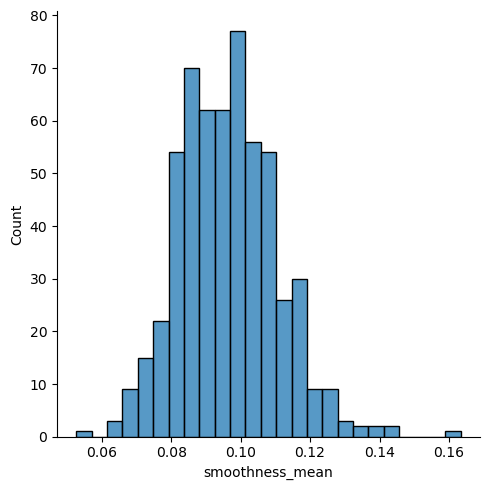

<Figure size 640x480 with 0 Axes>

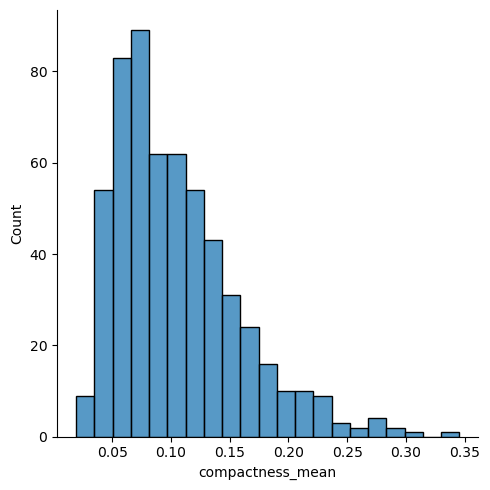

<Figure size 640x480 with 0 Axes>

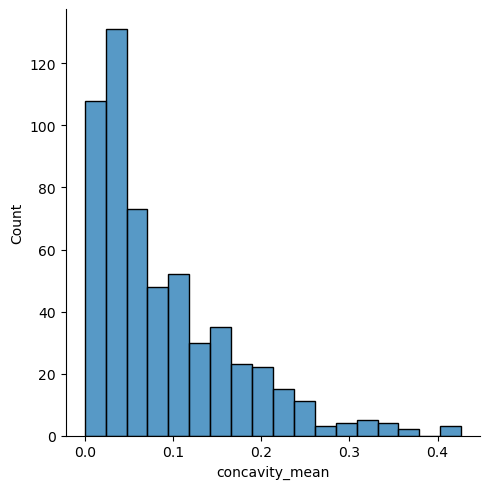

<Figure size 640x480 with 0 Axes>

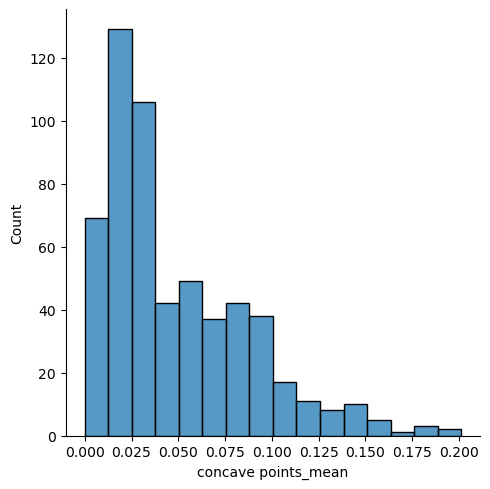

<Figure size 640x480 with 0 Axes>

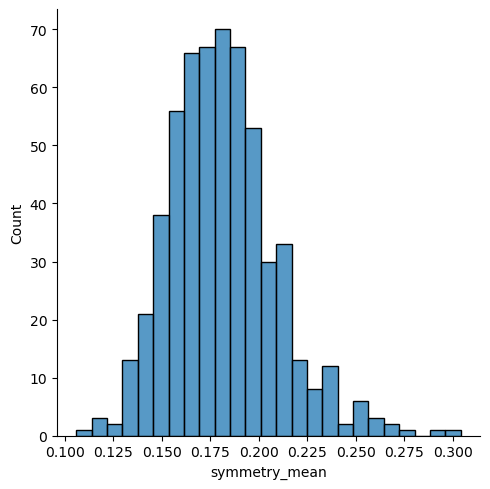

<Figure size 640x480 with 0 Axes>

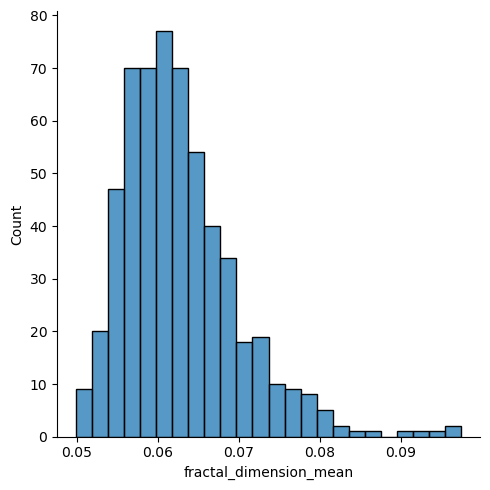

<Figure size 640x480 with 0 Axes>

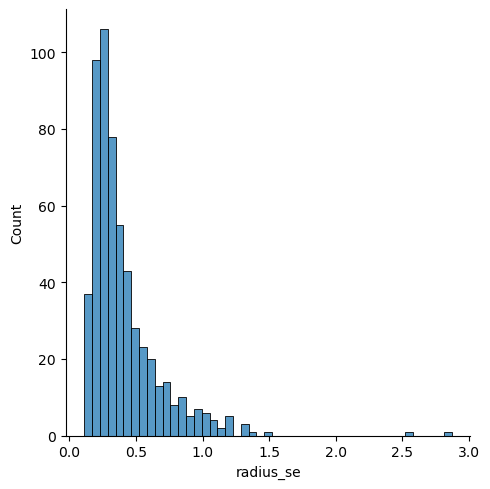

<Figure size 640x480 with 0 Axes>

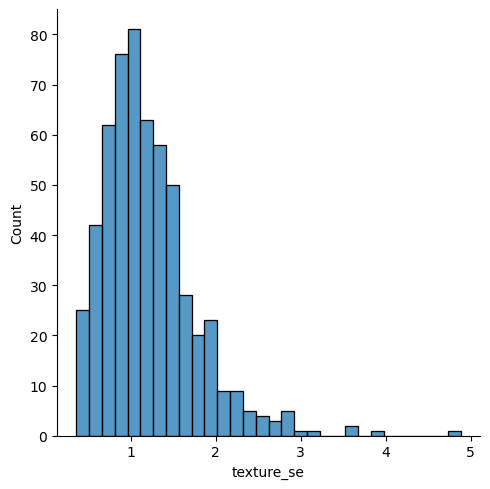

<Figure size 640x480 with 0 Axes>

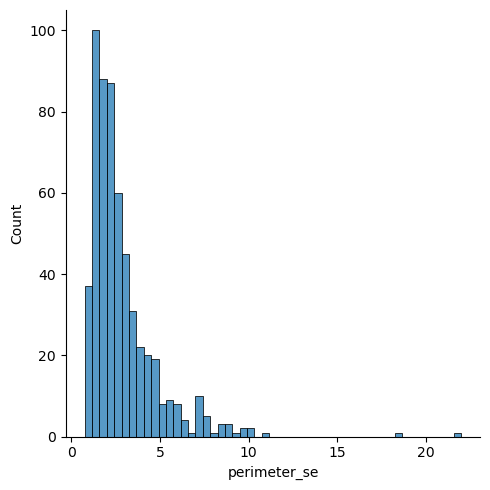

<Figure size 640x480 with 0 Axes>

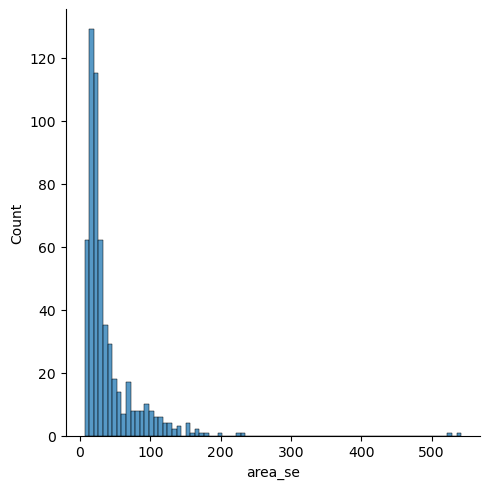

<Figure size 640x480 with 0 Axes>

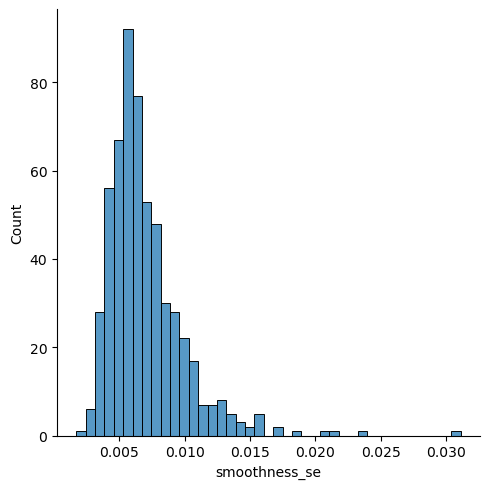

<Figure size 640x480 with 0 Axes>

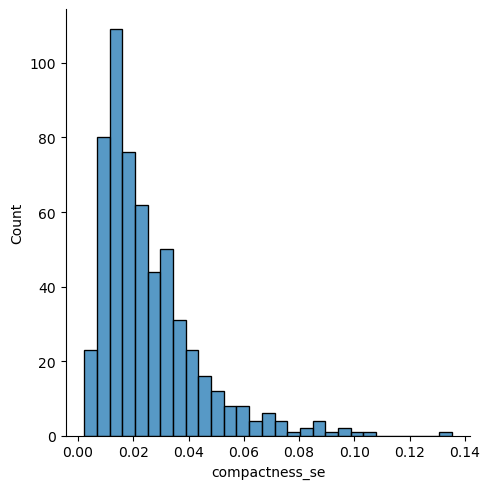

<Figure size 640x480 with 0 Axes>

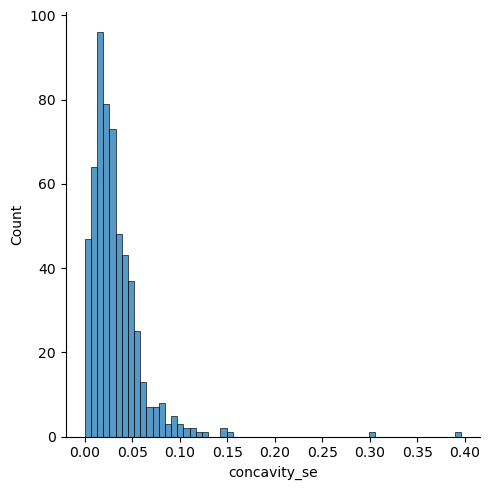

<Figure size 640x480 with 0 Axes>

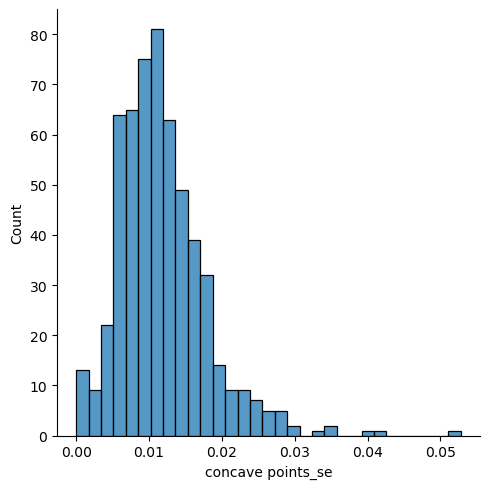

<Figure size 640x480 with 0 Axes>

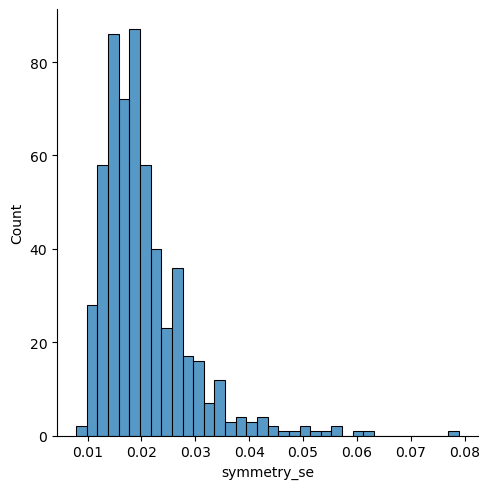

<Figure size 640x480 with 0 Axes>

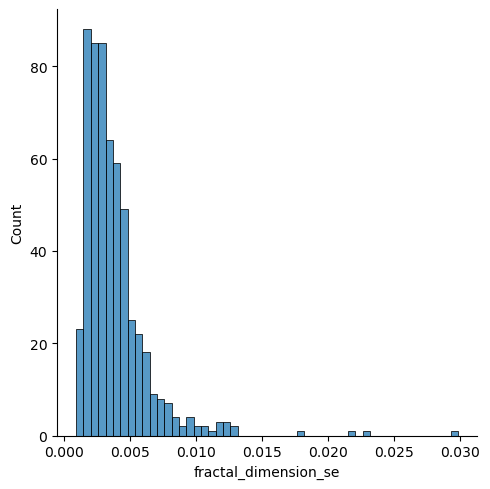

<Figure size 640x480 with 0 Axes>

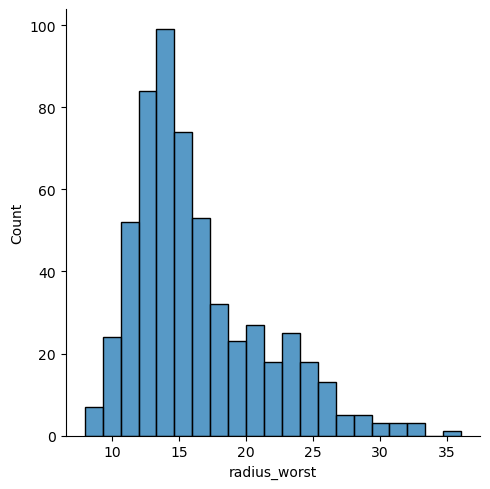

<Figure size 640x480 with 0 Axes>

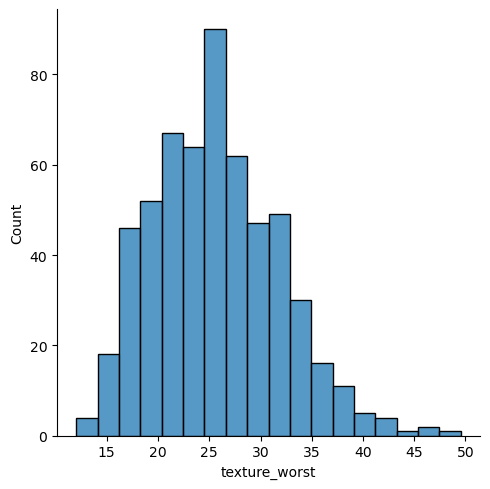

<Figure size 640x480 with 0 Axes>

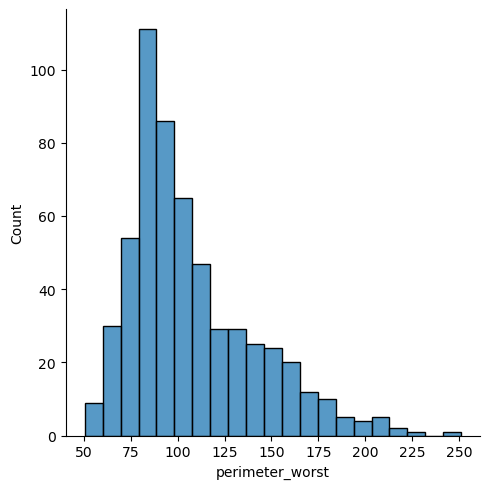

<Figure size 640x480 with 0 Axes>

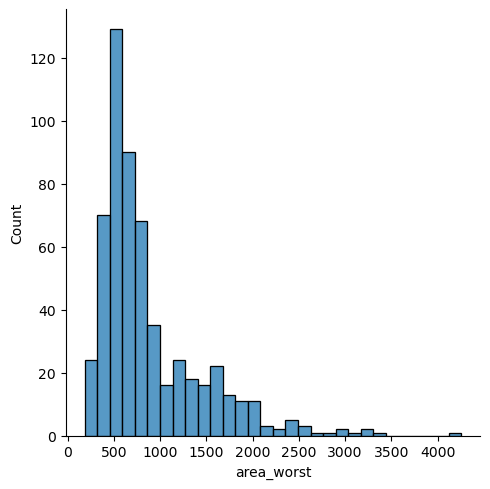

<Figure size 640x480 with 0 Axes>

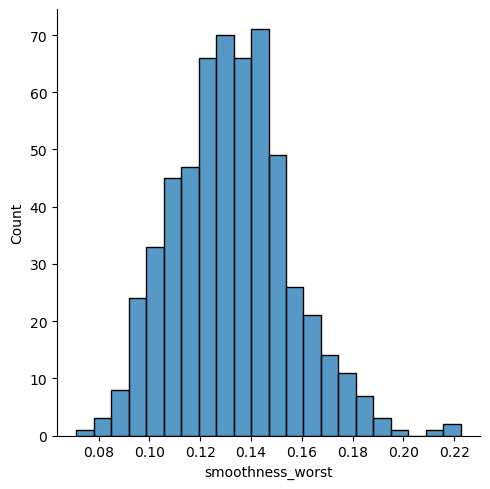

<Figure size 640x480 with 0 Axes>

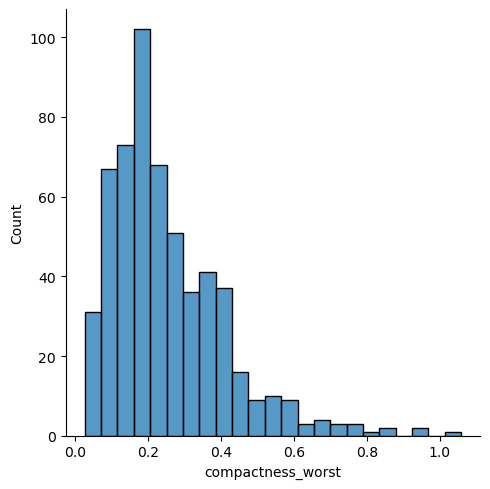

<Figure size 640x480 with 0 Axes>

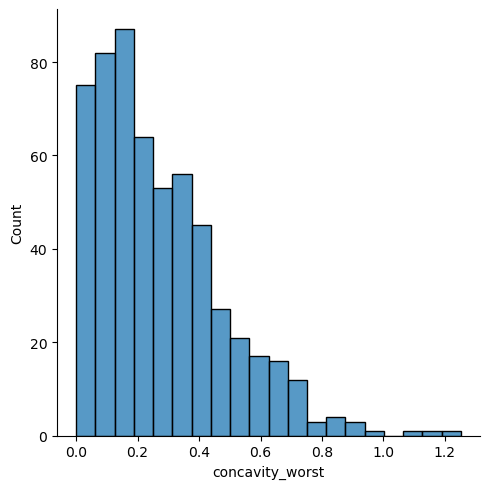

<Figure size 640x480 with 0 Axes>

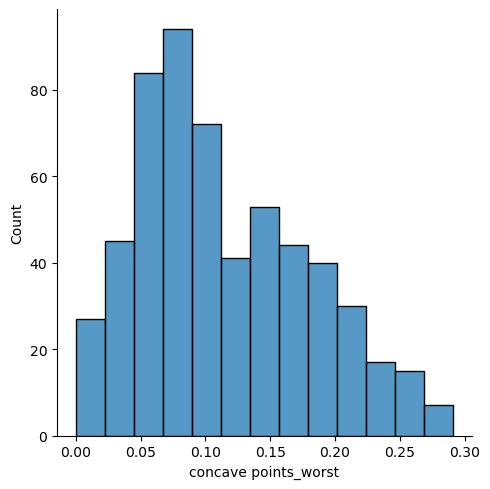

<Figure size 640x480 with 0 Axes>

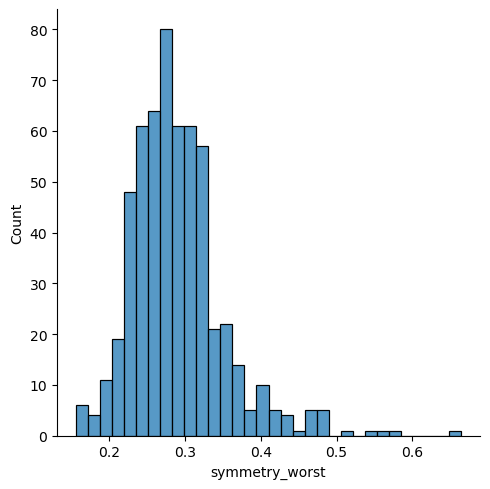

<Figure size 640x480 with 0 Axes>

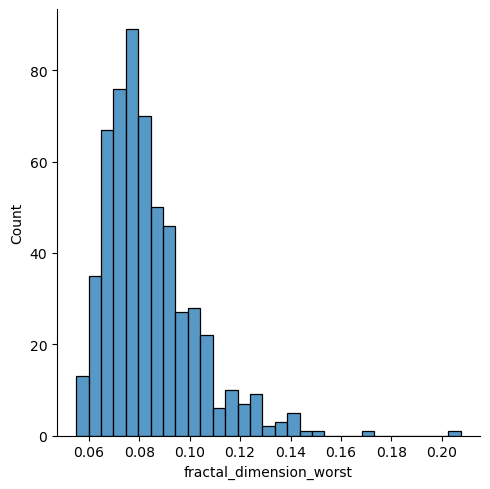

In [178]:
for col in data.select_dtypes('float'):
    plt.figure()
    sns.displot(data[col])


In [103]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Bivariate & Multivariate Analysis


firstly create a sub-set B and M

In [104]:
B_subset = data[data['diagnosis']=='B']
M_subset = data[data['diagnosis'] == 'M']

In [105]:
B_subset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [106]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


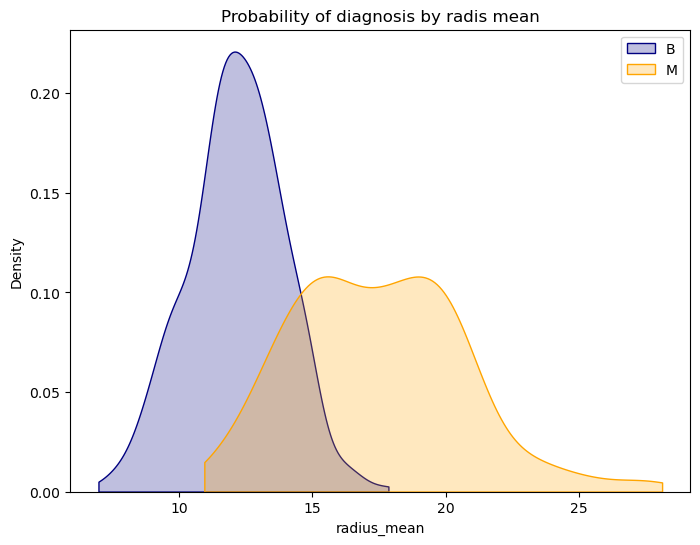

In [107]:
def kdeplot(x):
    plt.figure(figsize=(8,6))
    plt.title('Probability of diagnosis by radis mean')
    ax0= sns.kdeplot(B_subset[x], color='navy', label='diagnosis:B', fill =True, cut=0)
    ax1= sns.kdeplot(M_subset[x], color='orange', label='diagnosis:B', fill=True, cut=0)
    plt.legend(['B', 'M'], loc='upper right')
kdeplot('radius_mean')

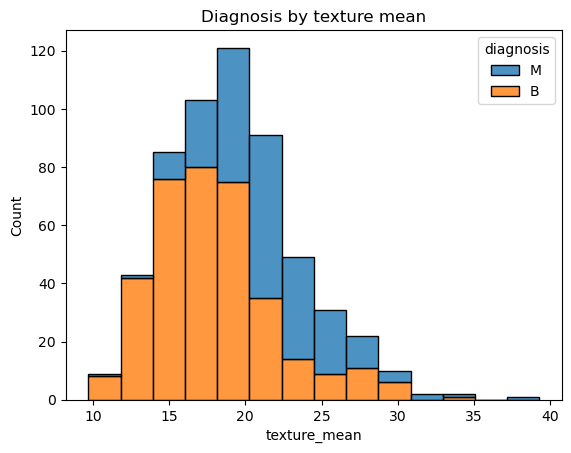

In [22]:
sns.histplot(x='texture_mean', hue='diagnosis', data=data, bins=14, alpha=0.8, multiple='stack')
plt.title('Diagnosis by texture mean')
plt.show()

In [185]:
# numeric_columns = data.select_dtypes(include=['float64'])
# numeric_columns.corr()

In [28]:
def changetype(data):
    code = {
        'B':0,
        'M':1
    }
    for col in data.select_dtypes('object').columns:
        data.loc[:,col] = data[col].map(code)
    return data

In [30]:
df = changetype(data)

In [31]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

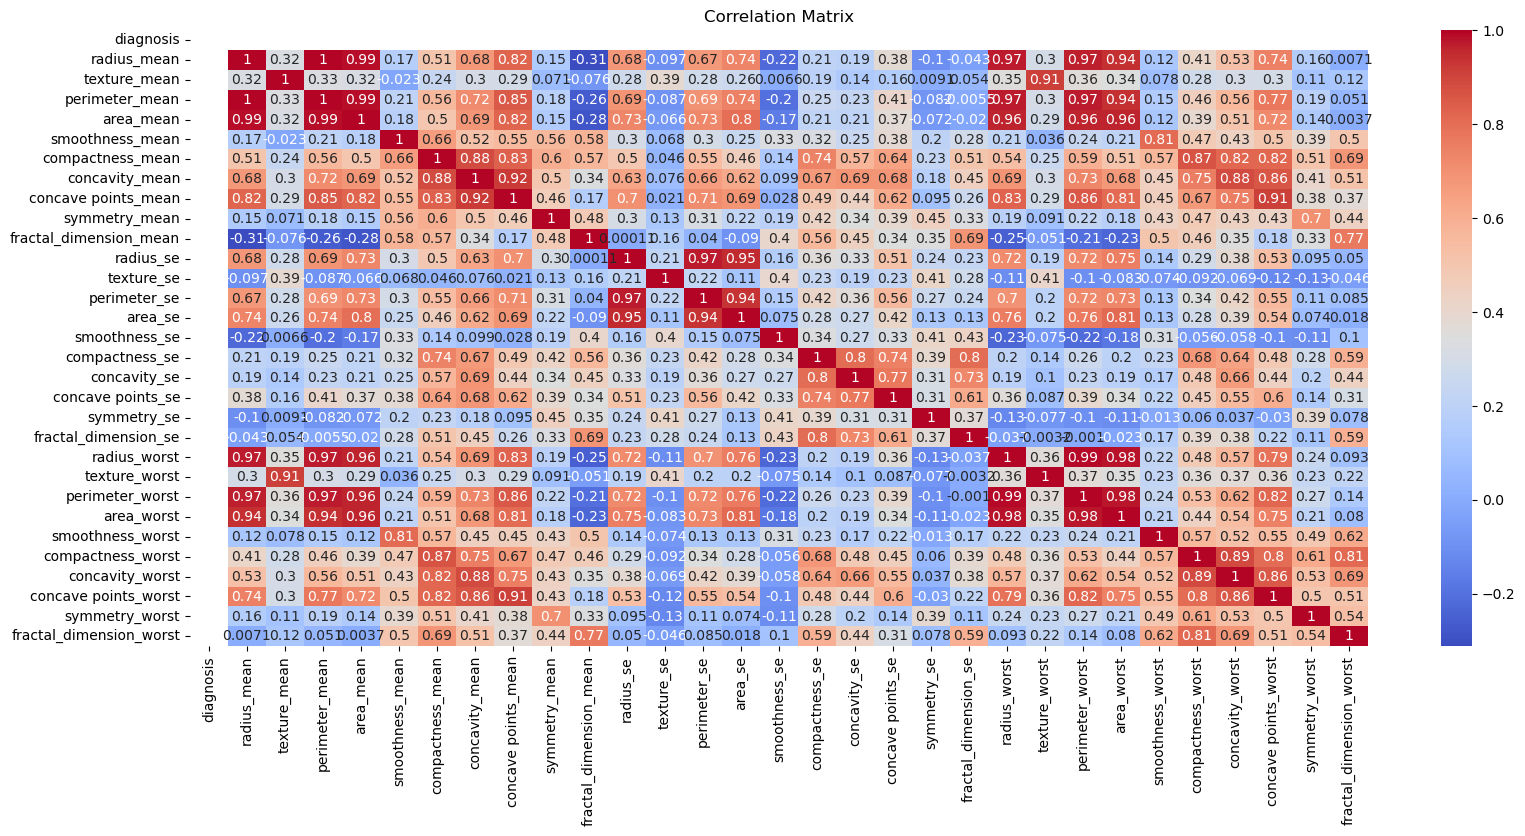

In [32]:
plt.figure(figsize=(19,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Processing & Engineering

In [108]:
data_copy = data.copy()

In [109]:
data_copy.duplicated().sum()

0

In [110]:
data_copy.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [56]:
data_copy.isna().sum()

diagnosis                  569
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
dtype: int64

## Label Encoding

In [112]:

labelEncoder = LabelEncoder()

data_copy['diagnosis'] = labelEncoder.fit_transform(data_copy['diagnosis'])

In [113]:
labelEncoder.classes_

array([0, 1])

## Features Scaling

In [114]:
scaler = MinMaxScaler()

In [115]:
# standardization for numeric values
columns_to_scale =['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

columns_scaled = ['radius_mean_scaled', 'texture_mean_scaled', 'perimeter_mean_scaled', 'area_mean_scaled',
       'smoothness_mean_scaled', 'compactness_mean_scaled', 'concavity_mean_scaled',
       'concave points_mean_scaled', 'symmetry_mean_scaled', 'fractal_dimension_mean_scaled',
       'radius_se_scaled', 'texture_se_scaled', 'perimeter_se_scaled', 'area_se_scaled', 'smoothness_se_scaled',
       'compactness_se_scaled', 'concavity_se_scaled', 'concave points_se_scaled', 'symmetry_se_scaled',
       'fractal_dimension_se_scaled', 'radius_worst_scaled', 'texture_worst_scaled',
       'perimeter_worst_scaled', 'area_worst_scaled', 'smoothness_worst_scaled',
       'compactness_worst_scaled', 'concavity_worst_scaled', 'concave points_worst_scaled',
       'symmetry_worst_scaled', 'fractal_dimension_worst_scaled']
scale_values= data_copy[columns_to_scale].values
scaled_array = scaler.fit_transform(scale_values)
df2_scaled = pd.DataFrame(scaled_array,columns=columns_scaled)
df2_scaled


,radius_mean_scaled,texture_mean_scaled,perimeter_mean_scaled,area_mean_scaled,smoothness_mean_scaled,compactness_mean_scaled,concavity_mean_scaled,concave points_mean_scaled,symmetry_mean_scaled,fractal_dimension_mean_scaled,...,radius_worst_scaled,texture_worst_scaled,perimeter_worst_scaled,area_worst_scaled,smoothness_worst_scaled,compactness_worst_scaled,concavity_worst_scaled,concave points_worst_scaled,symmetry_worst_scaled,fractal_dimension_worst_scaled
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


Concate df and df2_scaled

In [116]:
df3 = pd.concat([data_copy,df2_scaled],axis=1)
df3.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst_scaled,texture_worst_scaled,perimeter_worst_scaled,area_worst_scaled,smoothness_worst_scaled,compactness_worst_scaled,concavity_worst_scaled,concave points_worst_scaled,symmetry_worst_scaled,fractal_dimension_worst_scaled
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## Dataset Splitting

In [117]:
X = df3[['radius_mean_scaled', 'texture_mean_scaled', 'perimeter_mean_scaled', 'area_mean_scaled',
       'smoothness_mean_scaled', 'compactness_mean_scaled', 'concavity_mean_scaled',
       'concave points_mean_scaled', 'symmetry_mean_scaled', 'fractal_dimension_mean_scaled',
       'radius_se_scaled', 'texture_se_scaled', 'perimeter_se_scaled', 'area_se_scaled', 'smoothness_se_scaled',
       'compactness_se_scaled', 'concavity_se_scaled', 'concave points_se_scaled', 'symmetry_se_scaled',
       'fractal_dimension_se_scaled', 'radius_worst_scaled', 'texture_worst_scaled',
       'perimeter_worst_scaled', 'area_worst_scaled', 'smoothness_worst_scaled',
       'compactness_worst_scaled', 'concavity_worst_scaled', 'concave points_worst_scaled',
       'symmetry_worst_scaled', 'fractal_dimension_worst_scaled']].values
y = df3['diagnosis'].values

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [47]:
X[0]

array([0.52103744, 0.0226581 , 0.54598853, 0.36373277, 0.59375282,
       0.7920373 , 0.70313964, 0.73111332, 0.68636364, 0.60551811,
       0.35614702, 0.12046941, 0.3690336 , 0.27381126, 0.15929565,
       0.35139844, 0.13568182, 0.30062512, 0.31164518, 0.18304244,
       0.62077552, 0.14152452, 0.66831017, 0.45069799, 0.60113584,
       0.61929156, 0.56861022, 0.91202749, 0.59846245, 0.41886396])

## Machine Learning Modeling 


#### Create the Model

In [120]:
models=[]
models.append(('LR',LogisticRegression(solver='lbfgs',multi_class='auto')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('GB',GradientBoostingClassifier()))
models.append(('SVC',SVC(gamma='scale')))
models.append(('RFC',RandomForestClassifier(n_estimators=100)))
models.append(('DTR',DecisionTreeClassifier()))
models.append(('XGB',XGBClassifier(objective='multi:softmax', num_class=3)))

In [121]:
from sklearn.model_selection import KFold, cross_val_score

k = 5

results = []

for name, model in models:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Create a KFold object
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

    # Append results to the list
    results.append((name, scores.mean(), scores.std()))

results_df = pd.DataFrame(results, columns=['Model', 'Mean Accuracy', 'Std Deviation'])

results_df.sort_values(by='Mean Accuracy', ascending=False)

,Model,Mean Accuracy,Std Deviation
3,SVC,0.980220,0.017582
0,LR,0.967033,0.020850
1,KNN,0.962637,0.022628
2,GB,0.960440,0.014906
4,RFC,0.956044,0.015541
6,XGB,0.956044,0.023051
5,DTR,0.923077,0.018388


The **SVC** model has the highest mean accuracy ( 0.98) among the evaluated models. This means that, on average, the model correctly predicted the target variable for about 98% of the data points in each fold. It performs well on average across different folds, and it has a relatively low standard deviation (0.017582), indicating consistent performance.

In [122]:
SVC_model = SVC()
SVC_model_fitted = SVC_model.fit(X_train,y_train)
SCV_model_predict = SVC_model.predict(X_test)

## Classification Report

In [123]:
from sklearn.metrics import classification_report

print('SCV Classifier Report:\n',classification_report(y_test,SCV_model_predict))

SCV Classifier Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



it can be observed that the model has shown good performance with high values of precision, recall, F1-score, and accuracy for both classes (0 and 1). This indicates that the model performed well for binary classification.

In [124]:
# construct the confusion matrix for tuned model
confusion_matrix_rf = confusion_matrix(y_test, SCV_model_predict)

confusion_matrix_rf

array([[66,  1],
       [ 2, 45]], dtype=int64)

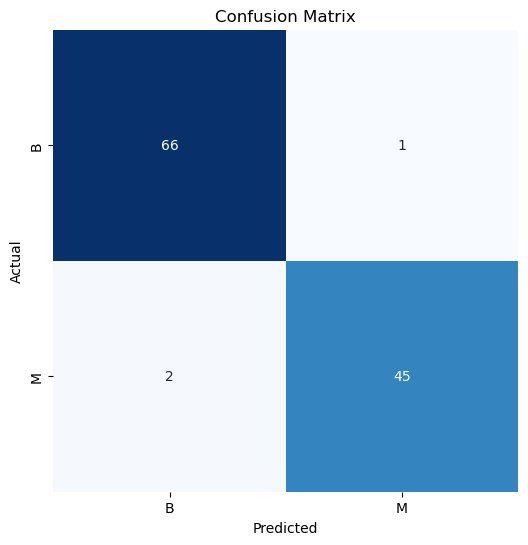

In [125]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['B', 'M'],
            yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- There are 66 true positives (TP). This means that the model correctly classified 66 examples as positive (class 1).
- There are 45 true negatives (TN). This means that the model correctly classified 45 examples as negative (class 0).
- There is 1 false positive (FP). This means that the model incorrectly classified 1 example as positive when it should have been negative.
- There are 2 false negatives (FN). This means that the model incorrectly classified 2 examples as negative when they should have been positive.

## Hyperparameters tuning 

In [126]:
# Check current model parameters

current_params = SVC_model.get_params()
current_params

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Let's check the best parameter with GridSearchCV

In [127]:
#define grid parameter
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}
#Use GridSearchCV to see the best hyperparameter
grid_search = GridSearchCV(SVC_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#print the result
print("best hyperparameters :", grid_search.best_params_)
print("accuracy score :", grid_search.score(X_test, y_test))


best hyperparameters : {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
accuracy score : 0.9736842105263158


# Export key components


we want to install pickle and export all keys needed for streamlit

In [2]:
%pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [132]:
import os
import pickle
# set the destination path to the "toolkit" directory
destination = "toolkit"

 # create a dictionary to store the objects and their filenames
 
models ={
     'numerical_input':columns_to_scale,
     'encoder':labelEncoder,
     'svc_model':SVC_model
    }

# loop through the models and save them using pickle.dump()
for name, model in models.items():
    with open(os.path.join(destination, f"{name}.pkl"), 'wb') as file:
        pickle.dump(model, file)  



In [133]:
!pip freeze > requirements.txt
